In [11]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [12]:
load_dotenv()

True

In [13]:
llm = ChatGroq(model="llama-3.1-8b-instant")

In [14]:
# State for Jokes


class JokeState(TypedDict):
    topic: str
    joke: str
    explaination: str

In [15]:
# Generate the Joke on the Topic(Node)
def get_joke(state: JokeState):
    # get topic
    topic = state["topic"]

    # generate prompt
    prompt = f"Generate a Small Joke on Topic: {topic}"

    response = llm.invoke(prompt).content

    return {"joke": response}


# Generate Explaination of the Joke(Node)
def explain_joke(state: JokeState):
    # get joke
    joke = state["joke"]

    # generate prompt
    prompt = f"Understand and Explain the provided joke in simple words.\n{joke}"

    response = llm.invoke(prompt).content

    return {"explaination": response}

In [16]:
graph = StateGraph(JokeState)

In [17]:
# add nodes
graph.add_node("generate_joke", get_joke)
graph.add_node("explain_joke", explain_joke)

# Add Edges
graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "explain_joke")
graph.add_edge("explain_joke", END)

> Here we will make the checkpointer and during compiling pass the checkpointer which we are using


In [18]:
# Checkpointer
checkpoints = InMemorySaver()

# Pass the checkpointer to graph

workflow = graph.compile(checkpointer=checkpoints)

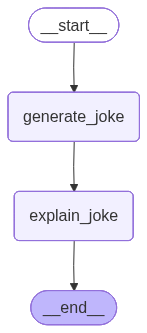

In [19]:
workflow

> During the time of Invoke pass the Unique Thread id.

The thread id is made using `configurable mapping of thread` which can be stored to some variable and pass during invoke


In [20]:
# This is how to define configurable mapping
config1 = {"configurable": {"thread_id": "1"}}

In [21]:
workflow.invoke({"topic": "Indian Economy"}, config=config1)

{'topic': 'Indian Economy',
 'joke': 'Why did the Indian Rupee go to therapy?\n\nBecause it was feeling a little "devalued"!',
 'explaination': 'The joke is about the Indian Rupee (the currency of India) going to therapy. \n\nIn simple words, the punchline "feeling a little \'devalued\'" has a double meaning. \n\n1. \'Devalued\' means when a currency loses its value or becomes less strong. This is often a financial term.\n2. \'Devalued\' also means feeling not valued or appreciated, which is a common problem people face in therapy.\n\nSo, the joke is saying that the Rupee went to therapy because it was feeling not valued or appreciated (like a person would), but also because its value was actually decreasing (like a financial term). It\'s a play on words, making it a funny joke.'}

In [22]:
# To get the states of that thread
workflow.get_state(config1)

StateSnapshot(values={'topic': 'Indian Economy', 'joke': 'Why did the Indian Rupee go to therapy?\n\nBecause it was feeling a little "devalued"!', 'explaination': 'The joke is about the Indian Rupee (the currency of India) going to therapy. \n\nIn simple words, the punchline "feeling a little \'devalued\'" has a double meaning. \n\n1. \'Devalued\' means when a currency loses its value or becomes less strong. This is often a financial term.\n2. \'Devalued\' also means feeling not valued or appreciated, which is a common problem people face in therapy.\n\nSo, the joke is saying that the Rupee went to therapy because it was feeling not valued or appreciated (like a person would), but also because its value was actually decreasing (like a financial term). It\'s a play on words, making it a funny joke.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f092de9-6bac-6033-8002-a93ee0d7dd38'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, c

In [25]:
# All intermediate state values can be seen using history by passing thread Id
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Indian Economy', 'joke': 'Why did the Indian Rupee go to therapy?\n\nBecause it was feeling a little "devalued"!', 'explaination': 'The joke is about the Indian Rupee (the currency of India) going to therapy. \n\nIn simple words, the punchline "feeling a little \'devalued\'" has a double meaning. \n\n1. \'Devalued\' means when a currency loses its value or becomes less strong. This is often a financial term.\n2. \'Devalued\' also means feeling not valued or appreciated, which is a common problem people face in therapy.\n\nSo, the joke is saying that the Rupee went to therapy because it was feeling not valued or appreciated (like a person would), but also because its value was actually decreasing (like a financial term). It\'s a play on words, making it a funny joke.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f092de9-6bac-6033-8002-a93ee0d7dd38'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, 

In [27]:
len(list(workflow.get_state_history(config1)))

4

**Here we are getting 4 Values**

1. **State value before START**
2. **State value after start and before generating joke**
3. **State value after generating joke and before explaination**
4. **State value after explaination and before END**


In [28]:
for i in list(workflow.get_state_history(config1)):
    print("=" * 50)
    print(i)

StateSnapshot(values={'topic': 'Indian Economy', 'joke': 'Why did the Indian Rupee go to therapy?\n\nBecause it was feeling a little "devalued"!', 'explaination': 'The joke is about the Indian Rupee (the currency of India) going to therapy. \n\nIn simple words, the punchline "feeling a little \'devalued\'" has a double meaning. \n\n1. \'Devalued\' means when a currency loses its value or becomes less strong. This is often a financial term.\n2. \'Devalued\' also means feeling not valued or appreciated, which is a common problem people face in therapy.\n\nSo, the joke is saying that the Rupee went to therapy because it was feeling not valued or appreciated (like a person would), but also because its value was actually decreasing (like a financial term). It\'s a play on words, making it a funny joke.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f092de9-6bac-6033-8002-a93ee0d7dd38'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, c

**Now lets Increase Thread and see the individual Threads**


In [29]:
config2 = {"configurable": {"thread_id": "2"}}

workflow.invoke({"topic": "Bhojpuri Cinema"}, config=config2)

{'topic': 'Bhojpuri Cinema',
 'joke': 'Why did the Bhojpuri film actor bring a ladder to the movie set?\n\nBecause his action scenes were always "up" to a higher level.',
 'explaination': "This joke is a play on words. \n\n- 'Up' has a double meaning here. \n  1. It means higher in a physical sense, like a ladder helps you climb up.\n  2. It also means 'excellent' or 'of high quality', like action scenes being 'up' to a higher level, meaning very good.\n\nSo, the joke is saying that the Bhojpuri film actor's action scenes are always of a very high quality (up to a higher level) and he brought a ladder to the movie set, which is a pun on the double meaning of the word 'up'."}

In [30]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'Bhojpuri Cinema', 'joke': 'Why did the Bhojpuri film actor bring a ladder to the movie set?\n\nBecause his action scenes were always "up" to a higher level.', 'explaination': "This joke is a play on words. \n\n- 'Up' has a double meaning here. \n  1. It means higher in a physical sense, like a ladder helps you climb up.\n  2. It also means 'excellent' or 'of high quality', like action scenes being 'up' to a higher level, meaning very good.\n\nSo, the joke is saying that the Bhojpuri film actor's action scenes are always of a very high quality (up to a higher level) and he brought a ladder to the movie set, which is a pun on the double meaning of the word 'up'."}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f092df8-f5b0-608d-8002-778f2246e952'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-16T09:28:52.895334+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_

In [32]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'Bhojpuri Cinema', 'joke': 'Why did the Bhojpuri film actor bring a ladder to the movie set?\n\nBecause his action scenes were always "up" to a higher level.', 'explaination': "This joke is a play on words. \n\n- 'Up' has a double meaning here. \n  1. It means higher in a physical sense, like a ladder helps you climb up.\n  2. It also means 'excellent' or 'of high quality', like action scenes being 'up' to a higher level, meaning very good.\n\nSo, the joke is saying that the Bhojpuri film actor's action scenes are always of a very high quality (up to a higher level) and he brought a ladder to the movie set, which is a pun on the double meaning of the word 'up'."}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f092df8-f5b0-608d-8002-778f2246e952'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-16T09:28:52.895334+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint

In [33]:
len(list(workflow.get_state_history(config2)))

4

In [34]:
for i in list(workflow.get_state_history(config2)):
    print("=" * 60)
    print(i)

StateSnapshot(values={'topic': 'Bhojpuri Cinema', 'joke': 'Why did the Bhojpuri film actor bring a ladder to the movie set?\n\nBecause his action scenes were always "up" to a higher level.', 'explaination': "This joke is a play on words. \n\n- 'Up' has a double meaning here. \n  1. It means higher in a physical sense, like a ladder helps you climb up.\n  2. It also means 'excellent' or 'of high quality', like action scenes being 'up' to a higher level, meaning very good.\n\nSo, the joke is saying that the Bhojpuri film actor's action scenes are always of a very high quality (up to a higher level) and he brought a ladder to the movie set, which is a pun on the double meaning of the word 'up'."}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f092df8-f5b0-608d-8002-778f2246e952'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-16T09:28:52.895334+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_

In [ ]:
a = list(workflow.get_state_history(config1))
b = list(workflow.get_state_history(config2))

In [38]:
print("This is First Interaction")
print("=" * 100)
print(a)
print("=" * 100)
print("This is Second Interaction")
print("=" * 100)
print(b)

This is First Interaction
[StateSnapshot(values={'topic': 'Indian Economy', 'joke': 'Why did the Indian Rupee go to therapy?\n\nBecause it was feeling a little "devalued"!', 'explaination': 'The joke is about the Indian Rupee (the currency of India) going to therapy. \n\nIn simple words, the punchline "feeling a little \'devalued\'" has a double meaning. \n\n1. \'Devalued\' means when a currency loses its value or becomes less strong. This is often a financial term.\n2. \'Devalued\' also means feeling not valued or appreciated, which is a common problem people face in therapy.\n\nSo, the joke is saying that the Rupee went to therapy because it was feeling not valued or appreciated (like a person would), but also because its value was actually decreasing (like a financial term). It\'s a play on words, making it a funny joke.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f092de9-6bac-6033-8002-a93ee0d7dd38'}}, metadata={'source': 'loop', '